## Logistic Regression implementation on Algerian Forest Fires Dataset 

* Data Collection
* Exploratory Data Analysis
* Data Cleaning
* Model Building
* Model Predictions

### Data Set Information:

1. **Date :** (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)


2. **Temperature :** temperature noon (temperature max) in Celsius degrees: 22 to 42


3. **RH :** Relative Humidity in %: 21 to 90


4. **Ws :** Wind speed in km/h: 6 to 29


5. **Rain :** total day in mm: 0 to 16.8


6. **FFMC :** (Fine Fuel Moisture Code) index from the FWI system: 28.6 to 92.5


7. **DMC :** (Duff Moisture Code) index from the FWI system: 1.1 to 65.9


8. **DC :** (Drought Code) index from the FWI system: 7 to 220.4


9. **ISI :** (Initial Spread Index) index from the FWI system: 0 to 18.5


10. **BUI :** (Buildup Index) index from the FWI system: 1.1 to 68


11. **FWI :** (Fire Weather Index) index: 0 to 31.1


12. **Classes :** two classes, namely Fire and not Fire



## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [2]:
df = pd.read_csv("D:\DATA SCIENCE\FSDS - May 22\EDA\Algerian_forest_fires_dataset_UPDATE.csv",header=1)

## Exploratory Data Analysis

Exploratory Data Analysis(EDA), also known as Data Exploration, is a step in the Data Analysis Process, where a number of techniques are used to better understand the dataset being used.

In [3]:
# Display first five records of the data
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
# Display last five records of the data
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [5]:
# info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [6]:
# Number of rows and columns
df.shape

(246, 14)

In [7]:
# Making a copy of the data
df1 = df.copy()

In [8]:
df1.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


## Check for missing data

In [9]:
df1.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [10]:
df1[df1.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [11]:
df1[120:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


As we can see from the above dataframe, index number 122 and 123 has no use in this data analysis so therefore we can drop those rows.

In [12]:
df1.drop([122,123],inplace = True,axis=0)

In [13]:
df1[120:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [14]:
# resetting the index after dropping unnecessary rows
df1=df1.reset_index(drop=True)

In [15]:
df1[120:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
124,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [16]:
df1.shape

(244, 14)

* The dataset includes 244 instances that regroup a data of two regions of **Algeria**,namely the **Bejaia region** located in the northeast of Algeria and the **Sidi Bel-abbes region** located in the northwest of Algeria.
* 122 instances are present in the dataset for each region, so we will create a new feature region and divide those instances into **Bejaia** region and **Sidi-Bel Abbes** region respectively.

In [17]:
# Creating new feature region
df1.loc[:122,'region']='Bejaia'
df1.loc[122:,'region']='Sidi-Bel Abbes'

In [18]:
# checking the dataframe after creating a new feature region
df1

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,Bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,Bejaia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi-Bel Abbes
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes


In [19]:
# checking missing values after dropping nan values
df1.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
region         0
dtype: int64

In [20]:
# Drop the Duplicates if any
df1[df1.duplicated()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region


In [21]:
# List out column names to check 
df1.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region'],
      dtype='object')

Here some of the columns are misspaced so need to remove the space to make the column name simple

In [22]:
# strip unnecessary spaces
df1.columns = df1.columns.str.strip()
df1.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [23]:
df1[df1['Classes'].isnull()]   # inorder to check the row which is having the missing values

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
165,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,Sidi-Bel Abbes


In [24]:
# Remove null or nan value rows
df1 = df1.dropna().reset_index(drop=True)

In [25]:
df1

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,Bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,Bejaia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes
239,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi-Bel Abbes
240,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes
241,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes


In [26]:
df1.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
dtype: int64

No missing value present in the data now.

## Changing The DataTypes of the Columns

In [27]:
df1[['day','month','year','Temperature','RH','Ws']]=df1[['day','month','year','Temperature','RH','Ws']].astype('int64')

In [28]:
df1[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']]=df1[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']].astype(float)

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  region       243 non-null    object 
dtypes: float64(7), int64(6), object(2)
memory usage: 28.6+ KB


In [30]:
# Statistical Summary
df1.describe(include='all')

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243,243
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fire,Bejaia
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131,122
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,NaN,NaN
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,NaN,NaN
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,NaN,NaN
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,NaN,NaN
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,NaN,NaN
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,NaN,NaN


In [31]:
df1['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [32]:
df1['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

our dependent feature 'Classes' contains only two categories but due to extraspaces it is showing multiple categories which is not the case so need to strip the spacing in order to make two categories.

In [33]:
df1['Classes'] = df1['Classes'].str.strip()

In [34]:
df1['Classes'].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [35]:
# Separating numerical and categorical features
num_feat = [feature for feature in df1.columns if df1[feature].dtype!='O']
cat_feat = [feature for feature in df1.columns if df1[feature].dtype=='O']

In [36]:
num_feat

['day',
 'month',
 'year',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI']

In [37]:
cat_feat

['Classes', 'region']

## Univariate Analysis

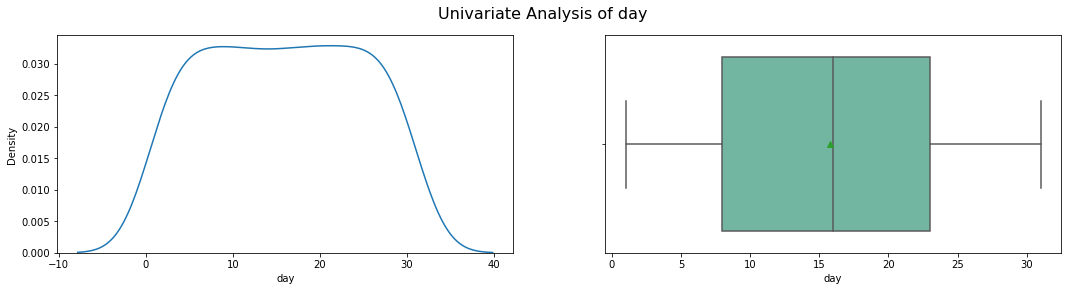

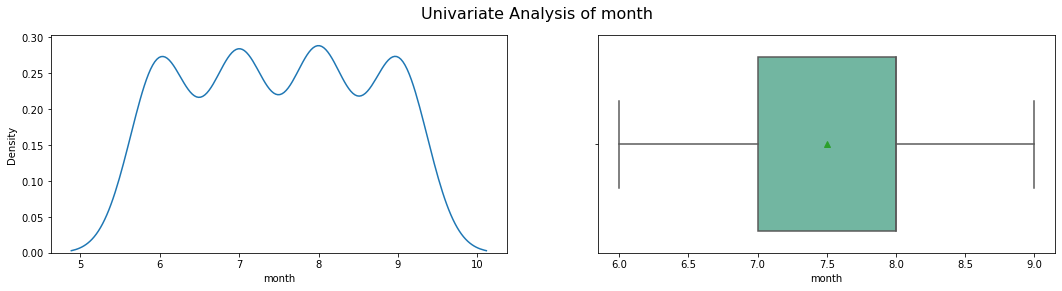

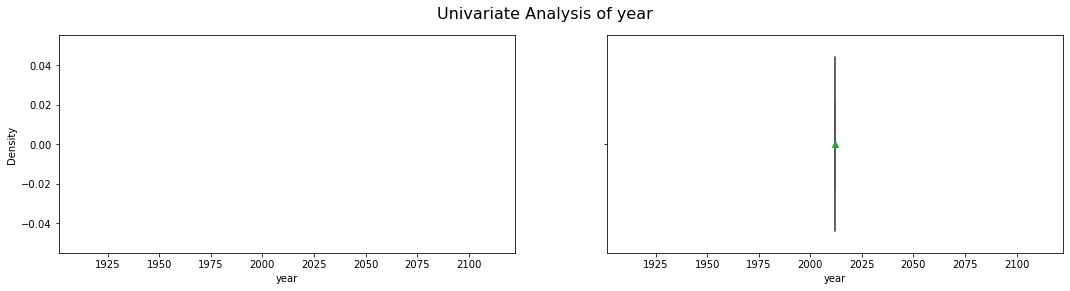

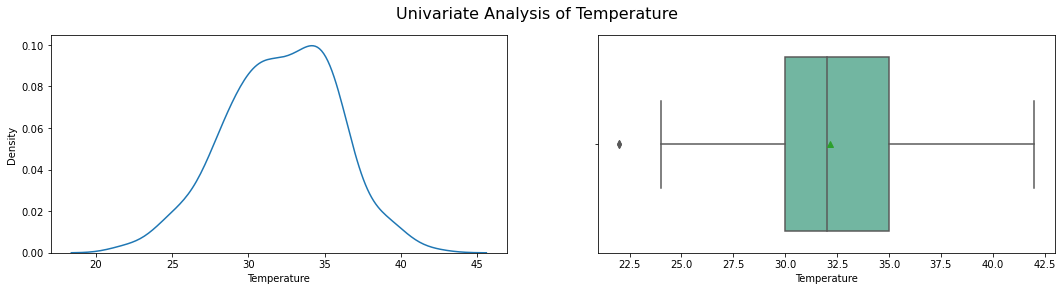

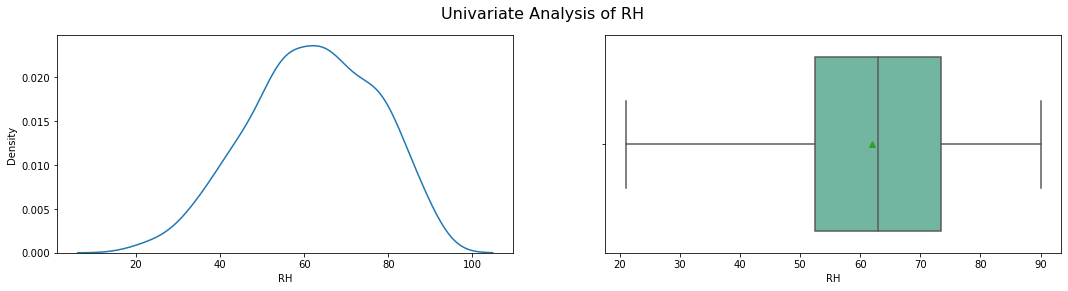

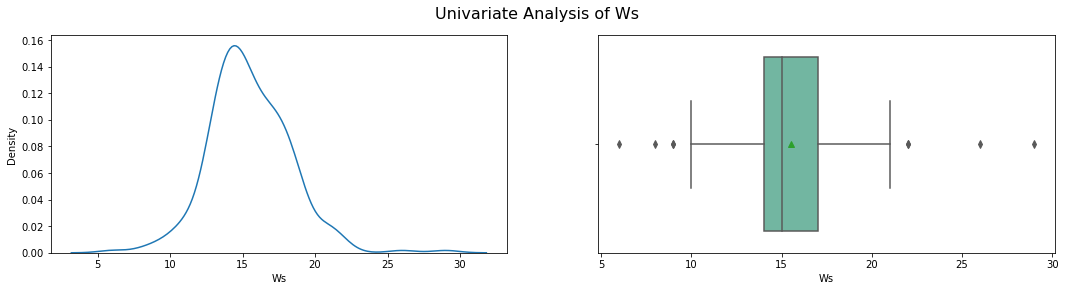

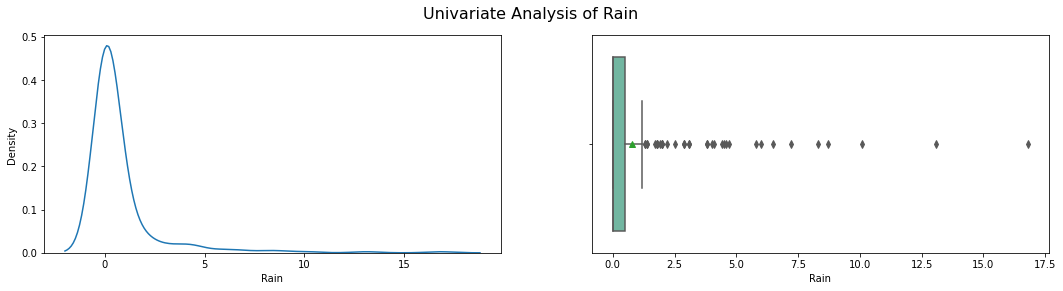

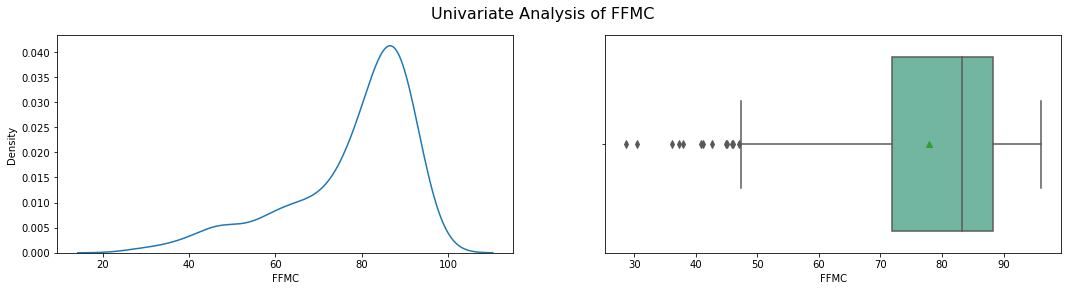

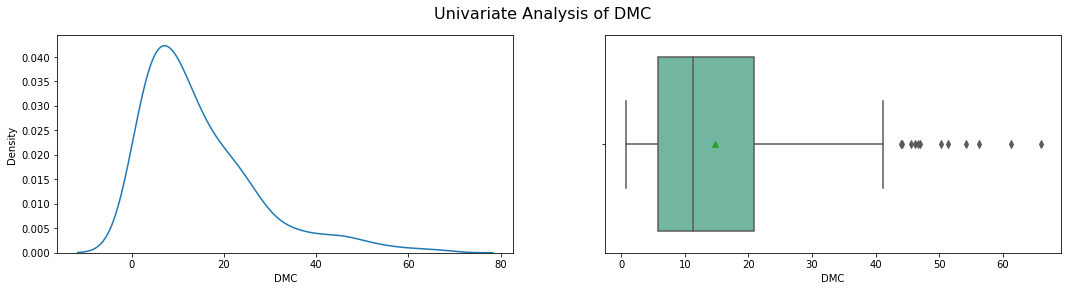

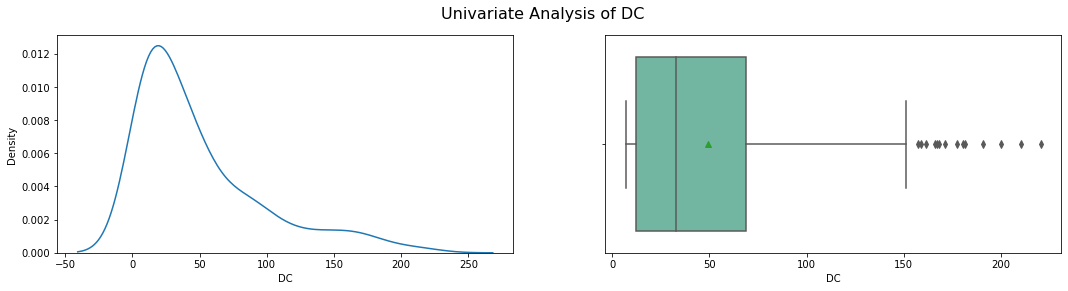

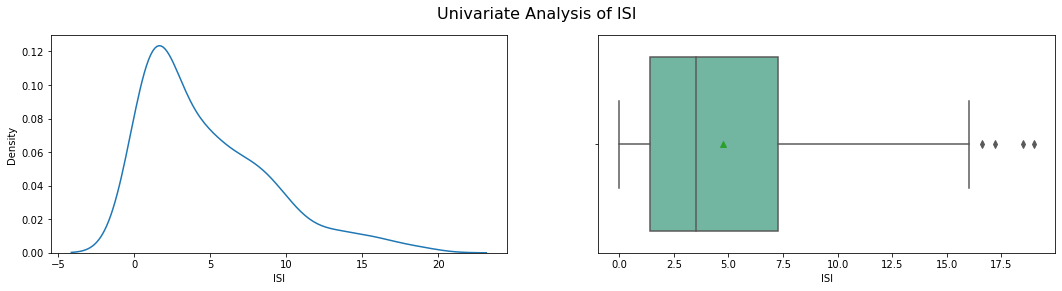

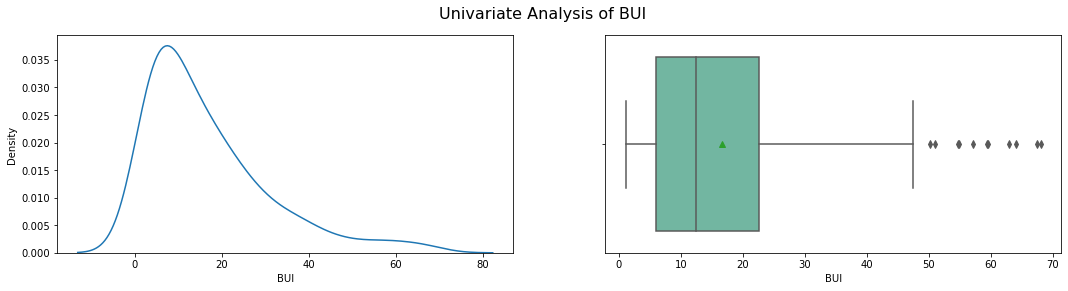

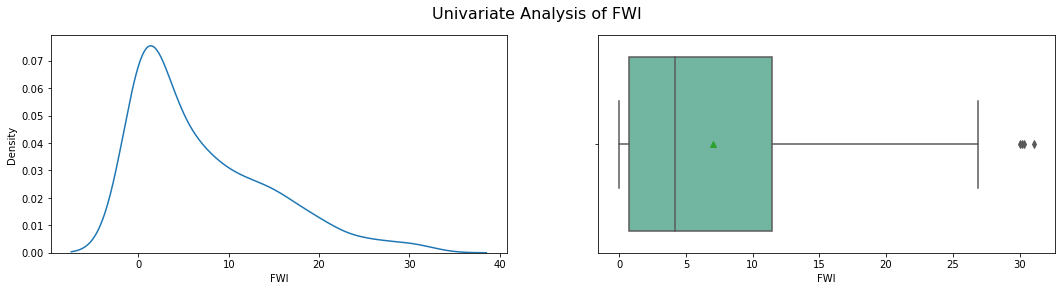

In [38]:
x_axis = num_feat
for x in x_axis:
    fig, axes = plt.subplots(1, 2, figsize=(18,4))
    sns.distplot(df1[x], ax=axes[0], kde = True, hist=False)
    sns.boxplot(df1[x], ax=axes[1], orient = "h", showmeans = True,palette="Set2")
    fig.suptitle('Univariate Analysis of ' + x, fontsize=16)

Above univariate analysis shows us presence of outliers in features like Ws, Rain, FFMC, DMC, DC, ISI, BUI and FWI

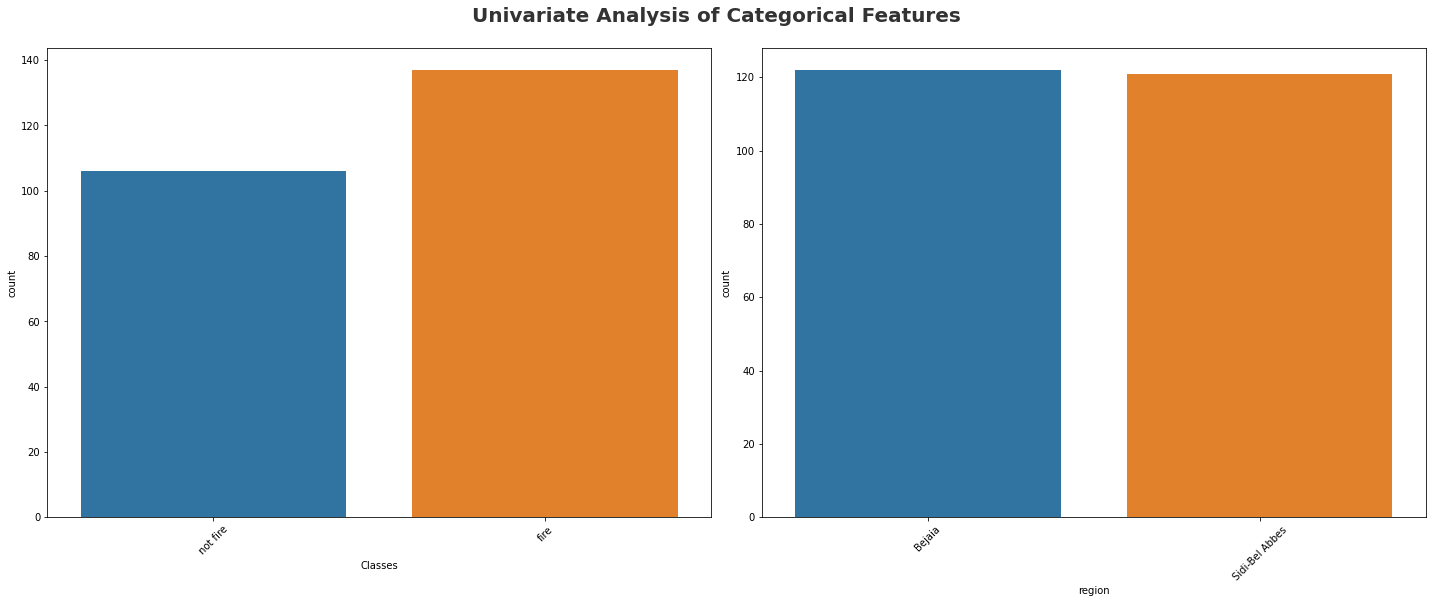

In [39]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(cat_feat)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df1[cat_feat[i]])
    plt.xlabel(cat_feat[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

The dependent feature 'Classes' shows balanced categories.

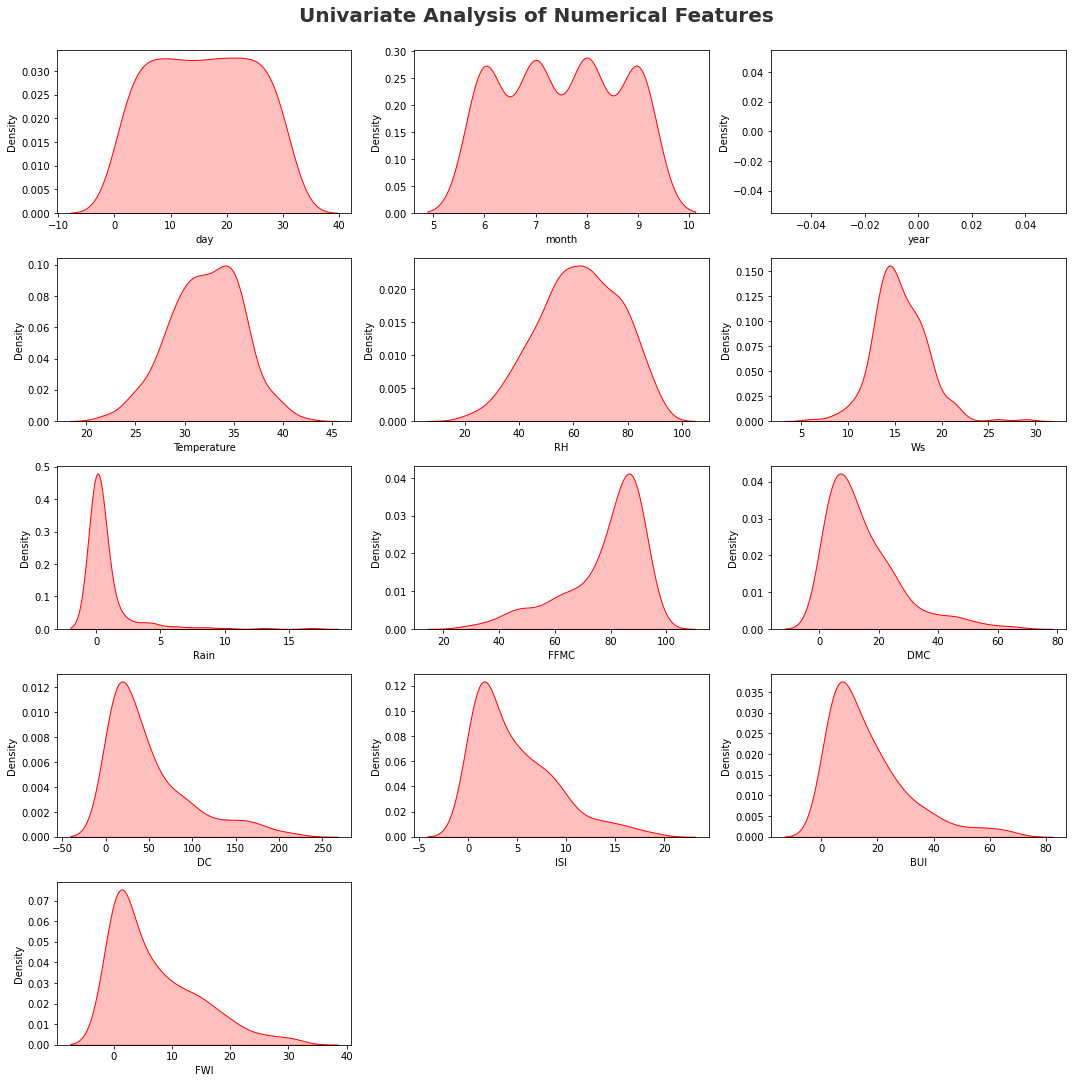

In [40]:
# kdeplot of numerical features
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_feat)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df1[num_feat[i]],shade=True, color='r')
    plt.xlabel(num_feat[i])
    plt.tight_layout()

### Observations:

* Rain, DMC, DC, FWI,ISI,BUI are right skewed
* FFMC is left skewed
* no variance in the year feature

## Bi variate Analysis

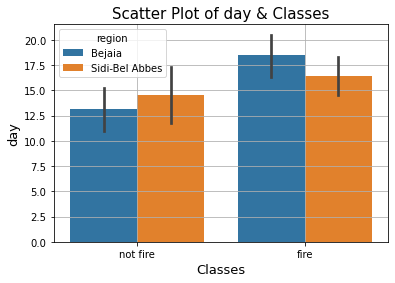

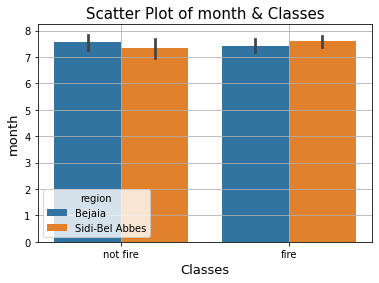

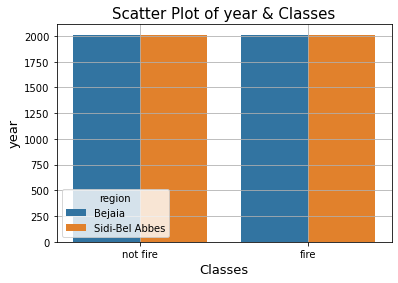

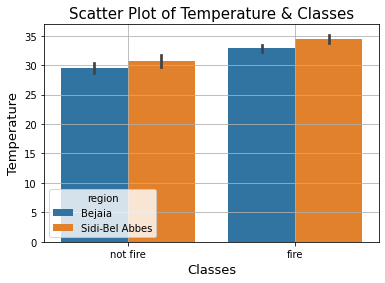

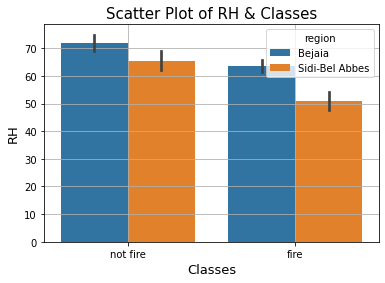

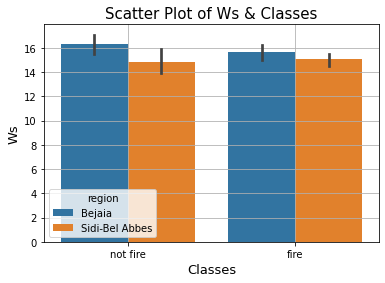

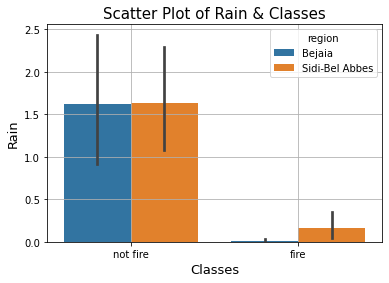

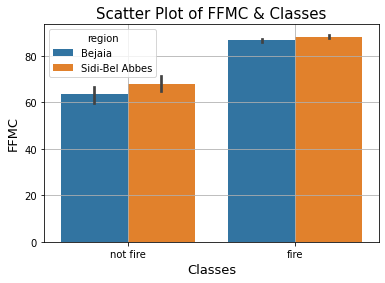

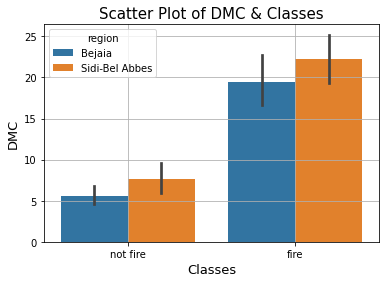

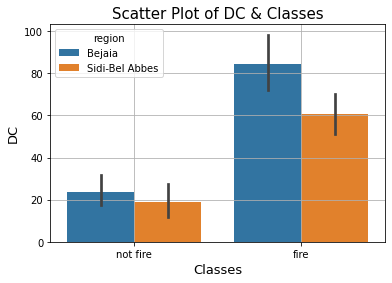

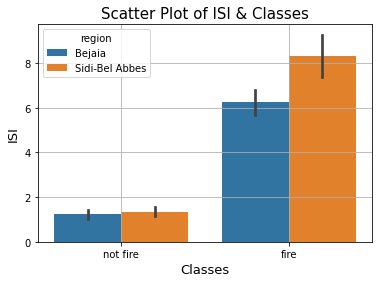

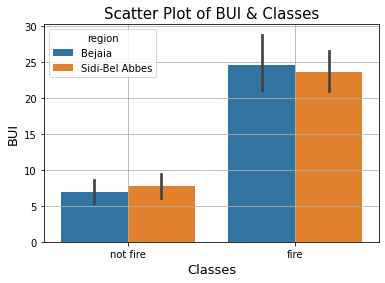

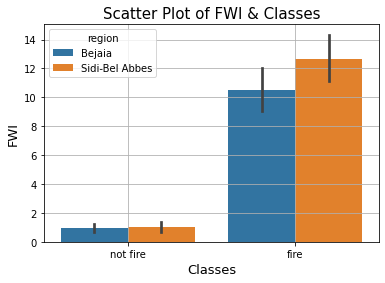

In [41]:
x_axis = df1.iloc[:,:-2]
y = "Classes"

for col in x_axis:
    sns.barplot(x = y, y = col, data = df1,hue='region')
    plt.xlabel(y, fontsize = 13)
    plt.ylabel(col, fontsize = 13)
    plt.title("Scatter Plot of " + col + " & " + y, fontsize = 15)
    plt.grid()
    plt.show()

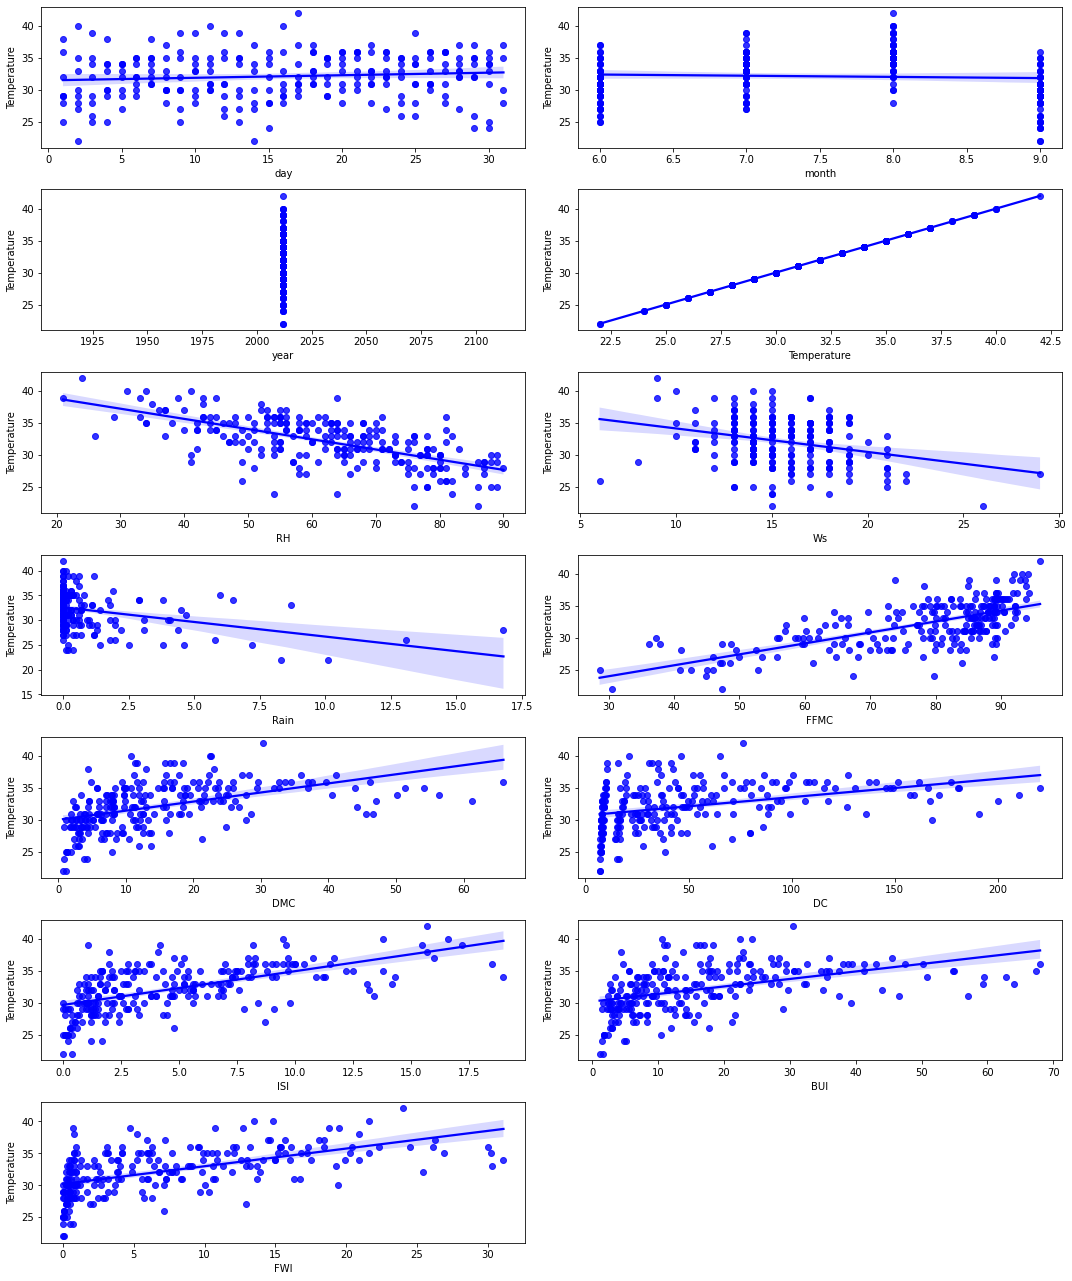

In [42]:
fig = plt.figure(figsize=(15, 20))

for i in range(0, len(num_feat)):
    ax = plt.subplot(8, 2, i+1)

    sns.regplot(data= df1 ,y='Temperature', x=num_feat[i], color='b')
    
    plt.tight_layout()

### Observations:

* RH shows negative correlation with Temperature as increase in RH reduces the Temperature.
* WS too shows negative correlation with Temperature but not as strong as RH.
* FFMC shows strong positive correlation as Temperature increases with FFMC which is clearly seen from the plot.
* ISI shows positive correlation with Temperature.

In [43]:
#dropped the year column as the fires all occured in the same year (2012)
df1.drop(['year'],axis=1,inplace=True)

In [44]:
df1.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,Bejaia
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia


## Correlation using Heatmap

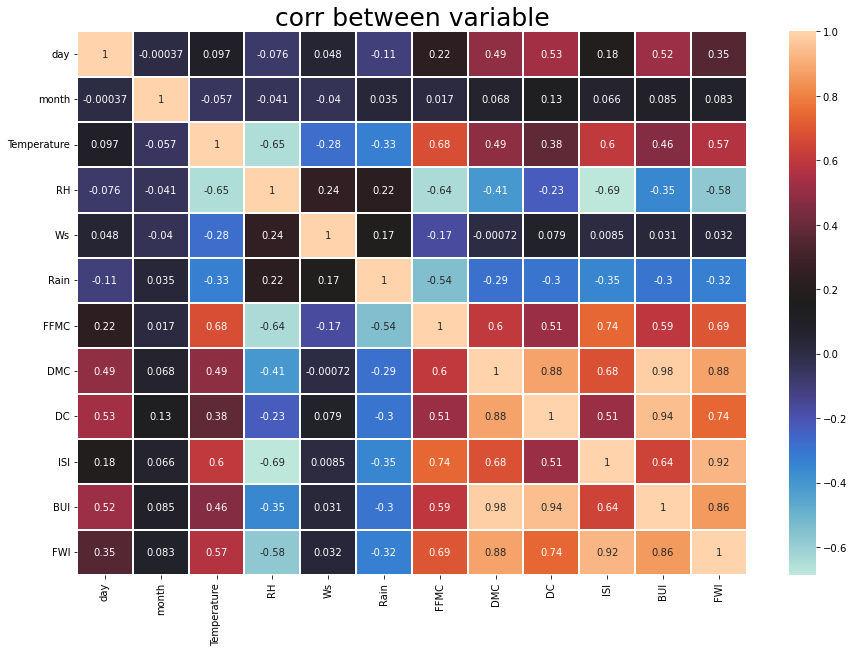

In [45]:
sns.heatmap(df1.corr(),annot=True,cmap='icefire',linewidths=0.3)
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.title("corr between variable",color='black',size=25)
plt.show()

### Observations:

* We can see DMC and BUI have high positive correlation.
* DC and BUI have high positive correlation.
* RH and Temp, RH and FFMC, RH and ISI have negative correlation.

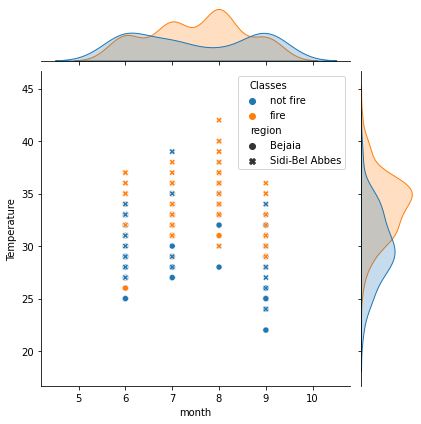

In [46]:
sns.jointplot(x='month',y='Temperature',data=df1,color='r',hue='Classes',style=df1['region'])

In the eighth month Sidi-Bel Abbes region catched maximum fire.

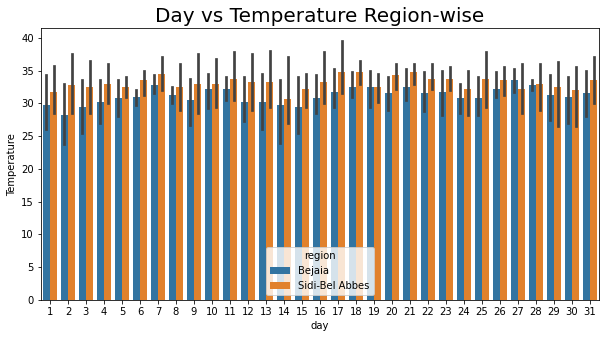

In [47]:
fig = plt.figure(figsize=(10, 5))
plt.style.use("default")
sns.barplot(df1['day'],df1['Temperature'],hue=df1['region'])
plt.title("Day vs Temperature Region-wise",fontsize=20)
plt.show()

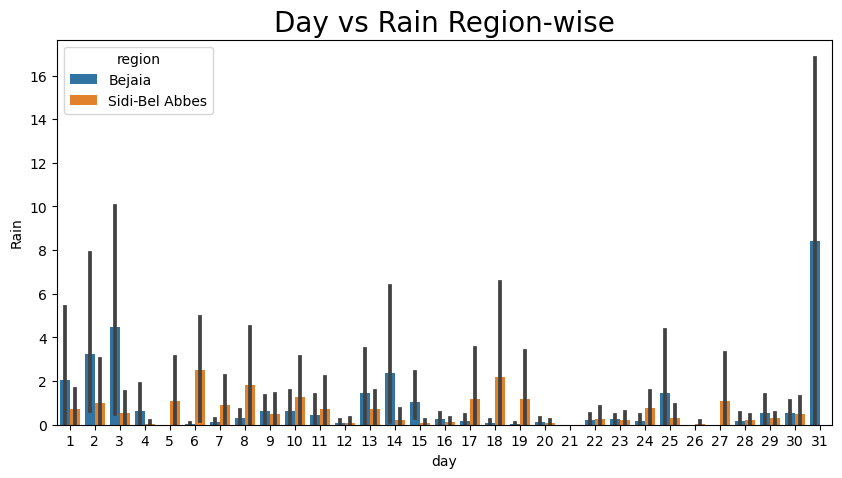

In [48]:
fig = plt.figure(figsize=(10, 5))
plt.style.use("default")
sns.barplot(df1['day'],df1['Rain'],hue=df1['region'])
plt.title("Day vs Rain Region-wise",fontsize=20)
plt.show()

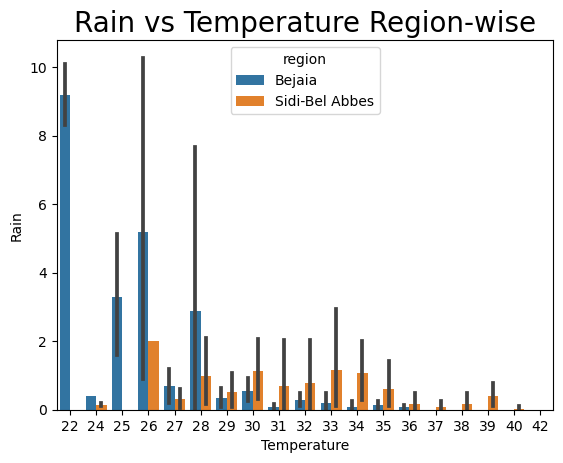

In [49]:
plt.style.use("default")
sns.barplot(df1['Temperature'],df1['Rain'],hue=df1['region'])
plt.title("Rain vs Temperature Region-wise",fontsize=20)
plt.show()

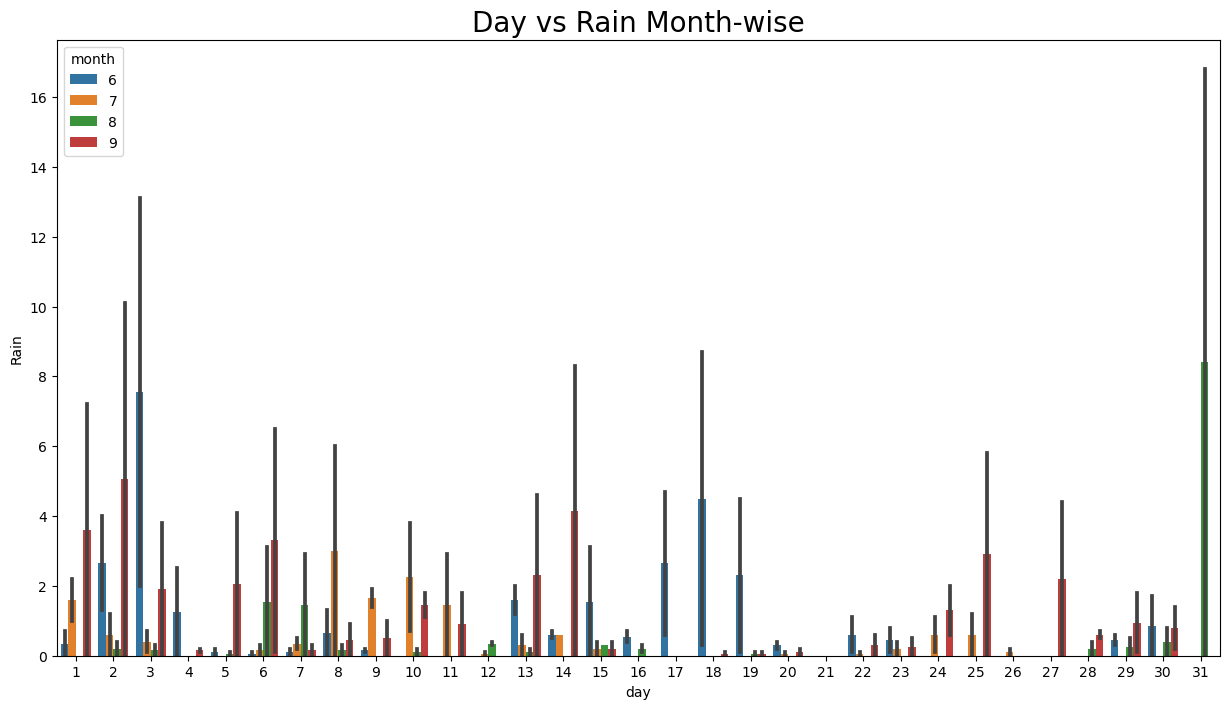

In [50]:
fig = plt.figure(figsize=(15, 8))
plt.style.use("default")
sns.barplot(df1['day'],df1['Rain'],hue=df1['month'])
plt.title("Day vs Rain Month-wise",fontsize=20)
plt.show()

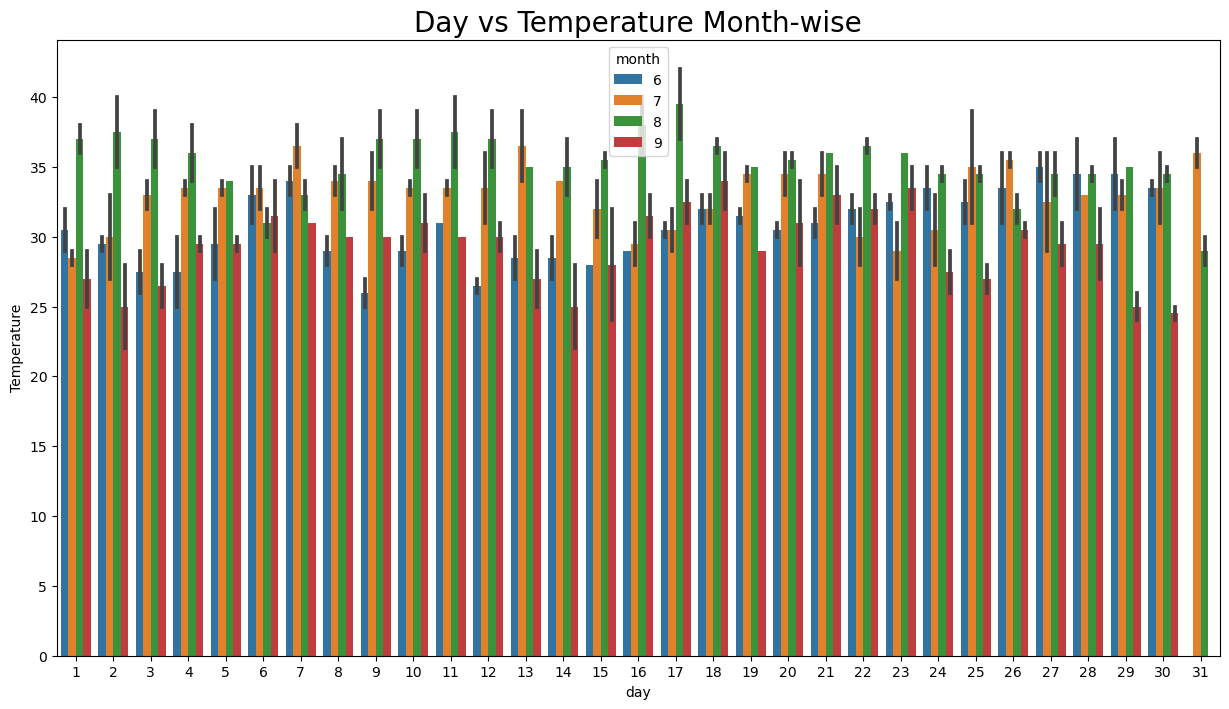

In [51]:
fig = plt.figure(figsize=(15, 8))
plt.style.use("default")
sns.barplot(df1['day'],df1['Temperature'],hue=df1['month'])
plt.title("Day vs Temperature Month-wise",fontsize=20)
plt.show()

In [52]:
# What is the highest temperature achieved and in which region?
df1.sort_values(by='Temperature', ascending=False)[['Temperature','day','month','region']].head(1)

,Temperature,day,month,region
198,42,17,8,Sidi-Bel Abbes


In [53]:
# What is the lowest temperature achieved and in which region?
df1.sort_values(by='Temperature', ascending=True)[['Temperature','day','month','region']].head(1)

,Temperature,day,month,region
105,22,14,9,Bejaia


In [54]:
# Which region shows highest rainfall and on which day?
df1.sort_values(by='Rain', ascending=False)[['Rain','day','month','region']].head(1)

,Rain,day,month,region
91,16.8,31,8,Bejaia


In [55]:
# Which region shows least rainfall and on which day?
df1.sort_values(by='Rain', ascending=True)[['Rain','day','month','region']].head(1)

,Rain,day,month,region
0,0.0,1,6,Bejaia


Text(0.5, 1.0, 'Pie Chart of Classes')

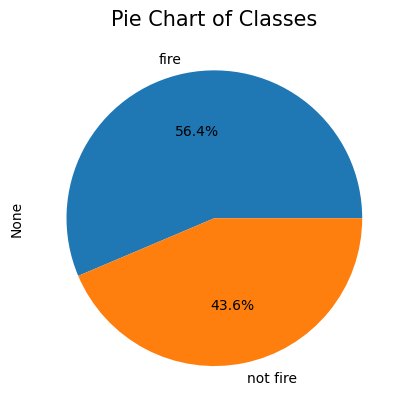

In [56]:
# plotting PieChart for target feature
df1.value_counts('Classes').plot(kind="pie",autopct = '%1.1f%%')
plt.title ("Pie Chart of Classes", fontsize = 15)

Text(0.5, 1.0, 'Fire Analysis Month wise')

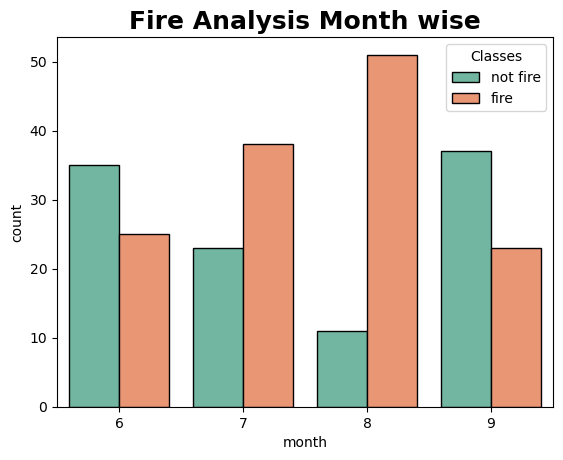

In [57]:
sns.countplot(x='month',hue='Classes',data= df1,ec='black', palette= 'Set2')
plt.title('Fire Analysis Month wise', fontsize=18, weight='bold')

Text(0.5, 1.0, 'Fire Analysis Day wise')

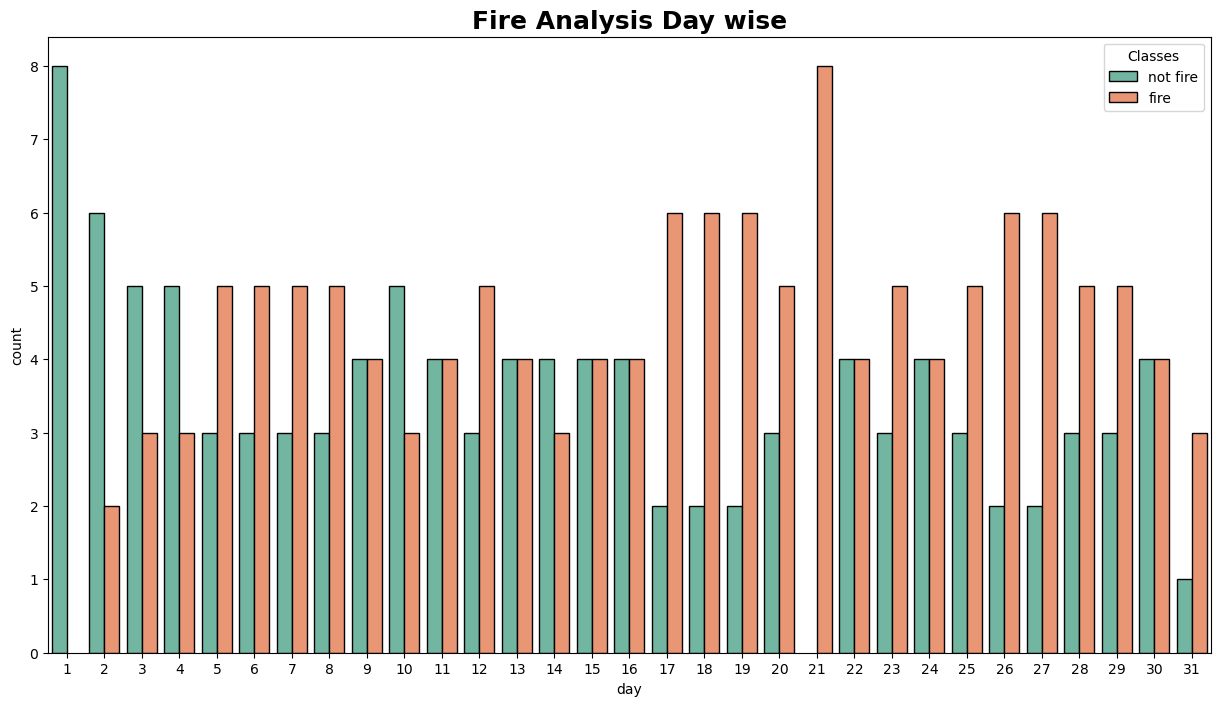

In [58]:
fig = plt.figure(figsize=(15, 8))
sns.countplot(x='day',hue='Classes',data= df1,ec='black', palette= 'Set2')
plt.title('Fire Analysis Day wise', fontsize=18, weight='bold')

In [59]:
df1['Classes'].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [60]:
df1.groupby(['day'])['Classes'].value_counts()

day  Classes 
1    not fire    8
2    not fire    6
     fire        2
3    not fire    5
     fire        3
4    not fire    5
     fire        3
5    fire        5
     not fire    3
6    fire        5
     not fire    3
7    fire        5
     not fire    3
8    fire        5
     not fire    3
9    fire        4
     not fire    4
10   not fire    5
     fire        3
11   fire        4
     not fire    4
12   fire        5
     not fire    3
13   fire        4
     not fire    4
14   not fire    4
     fire        3
15   fire        4
     not fire    4
16   fire        4
     not fire    4
17   fire        6
     not fire    2
18   fire        6
     not fire    2
19   fire        6
     not fire    2
20   fire        5
     not fire    3
21   fire        8
22   fire        4
     not fire    4
23   fire        5
     not fire    3
24   fire        4
     not fire    4
25   fire        5
     not fire    3
26   fire        6
     not fire    2
27   fire        6
     not fire    

## Handling Categorical Features

In [121]:
# Mapping Not fire as 0 and Fire as 1
df1['Classes']=df1['Classes'].map({'not fire':0,'fire':1})

In [62]:
df1['region']=df1['region'].map({'Bejaia':0,'Sidi-Bel Abbes':1})

In [63]:
df1

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [64]:
#Droping features ['day','month'] beacuse it is not important for analysis
df1.drop(['day','month'],axis=1,inplace=True)

In [65]:
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


## Split the data into X & y

In [66]:
# Independent and Dependent Features
X=df1.drop(['Classes'],axis=1)
y=df1['Classes']

In [67]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [68]:
y

0      0
1      0
2      0
3      0
4      0
      ..
238    1
239    0
240    0
241    0
242    0
Name: Classes, Length: 243, dtype: int64

## Train Test Split

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.30, random_state = 42)

In [71]:
X_train.shape , y_train.shape

((170, 11), (170,))

In [72]:
X_test.shape, y_test.shape

((73, 11), (73,))

## Variance Inflation Factor (VIF)

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [76]:
# Check multicollinearity
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,99.837511,Temperature
1,31.406445,RH
2,34.776930,Ws
3,1.653821,Rain
4,105.226816,FFMC
5,201.052935,DMC
6,51.625840,DC
7,52.403744,ISI
8,412.547369,BUI
9,76.981488,FWI


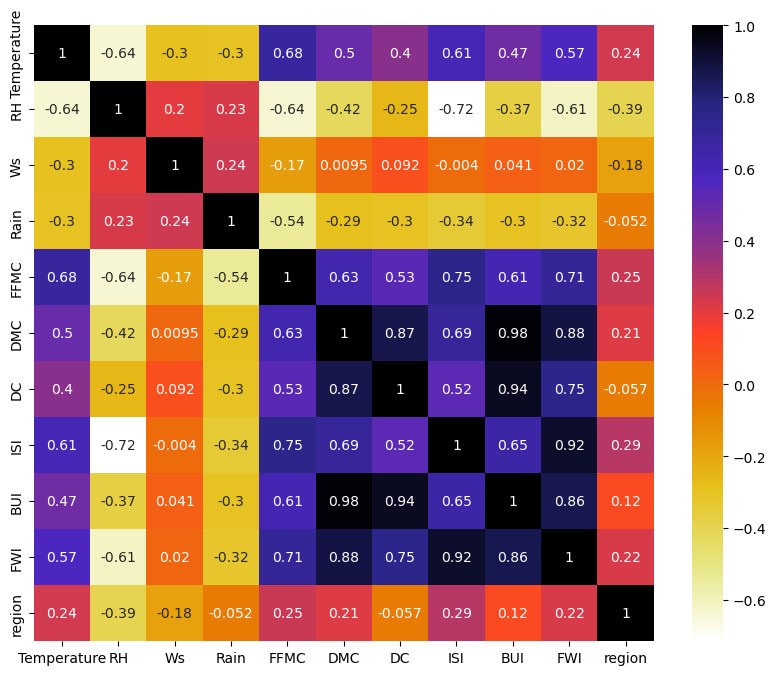

In [174]:
# Heatmap
plt.figure(figsize=(10,8))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [77]:
# drop features which has correlation more than 0.8
X_train.drop(['BUI','DC'],axis=1,inplace=True)
X_test.drop(['BUI','DC'],axis=1,inplace=True)

In [78]:
X_train.shape , X_test.shape

((170, 9), (73, 9))

In [79]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,FWI,region
29,33,50,14,0.0,88.7,22.9,7.2,12.9,0
120,26,80,16,1.8,47.4,2.9,0.3,0.1,0
114,32,54,11,0.5,73.7,7.9,1.2,0.7,0
241,24,54,18,0.1,79.7,4.3,1.7,0.7,1
5,31,67,14,0.0,82.6,5.8,3.1,2.5,0
...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,0.2,0.0,0
14,28,80,17,3.1,49.4,3.0,0.4,0.1,0
92,25,76,17,7.2,46.0,1.3,0.2,0.1,0
179,34,59,16,0.0,88.1,19.5,7.4,10.9,1


In [81]:
X_test

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,FWI,region
24,31,64,15,0.0,86.7,14.2,5.7,8.4,0
6,33,54,13,0.0,88.2,9.9,6.4,7.2,0
152,28,58,18,2.2,63.7,3.2,1.2,0.5,1
232,34,58,13,0.2,79.5,18.7,2.1,3.8,1
238,30,65,14,0.0,85.4,16.0,4.5,6.5,1
...,...,...,...,...,...,...,...,...,...
194,35,34,16,0.2,88.3,16.9,7.5,10.5,1
104,25,86,21,4.6,40.9,1.3,0.1,0.0,0
109,32,49,11,0.0,89.4,9.8,6.8,7.7,0
190,39,43,12,0.0,91.7,16.5,9.6,12.7,1


## Standardize or feature scaling the dataset

In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [83]:
X_train_scaled = scaler.fit_transform(X_train)

In [84]:
X_test_scaled = scaler.transform(X_test)

In [85]:
X_train_scaled

array([[ 0.26131696, -0.86261203, -0.59170487, ...,  0.57277215,
         0.74777936, -1.        ],
       [-1.64645715,  1.16565969,  0.17323679, ..., -1.03570698,
        -0.91039641, -1.        ],
       [-0.0112222 , -0.5921758 , -1.73911734, ..., -0.82590535,
        -0.83266942, -1.        ],
       ...,
       [-1.91899631,  0.89522346,  0.55570761, ..., -1.05901827,
        -0.91039641, -1.        ],
       [ 0.53385612, -0.25413052,  0.17323679, ...,  0.61939473,
         0.48868939,  1.        ],
       [-0.55630052,  0.96283252,  2.08559091, ..., -0.84921665,
        -0.88448741, -1.        ]])

In [86]:
X_test_scaled

array([[-2.83761359e-01,  8.39147711e-02, -2.09234040e-01,
        -3.85823876e-01,  6.47089705e-01, -5.89987708e-02,
         2.23102774e-01,  1.64826939e-01, -1.00000000e+00],
       [ 2.61316957e-01, -5.92175802e-01, -9.74175691e-01,
        -3.85823876e-01,  7.52243844e-01, -3.92549439e-01,
         3.86281817e-01,  9.37296044e-03, -1.00000000e+00],
       [-1.10137883e+00, -3.21739572e-01,  9.38178437e-01,
         6.21141440e-01, -9.65273758e-01, -9.12267923e-01,
        -8.25905354e-01, -8.58578417e-01,  1.00000000e+00],
       [ 5.33856115e-01, -3.21739572e-01, -9.74175691e-01,
        -2.94281575e-01,  1.42349838e-01,  2.90065882e-01,
        -6.16103728e-01, -4.31079978e-01,  1.00000000e+00],
       [-5.56300516e-01,  1.51523828e-01, -5.91704866e-01,
        -3.85823876e-01,  5.55956118e-01,  8.06270905e-02,
        -5.66327264e-02, -8.13085268e-02,  1.00000000e+00],
       [ 1.89655190e+00,  8.39147711e-02, -2.50405899e+00,
         1.63429932e-01, -2.57235889e-01, -2.529235

Text(0.5, 1.0, 'X_train After Scaling')

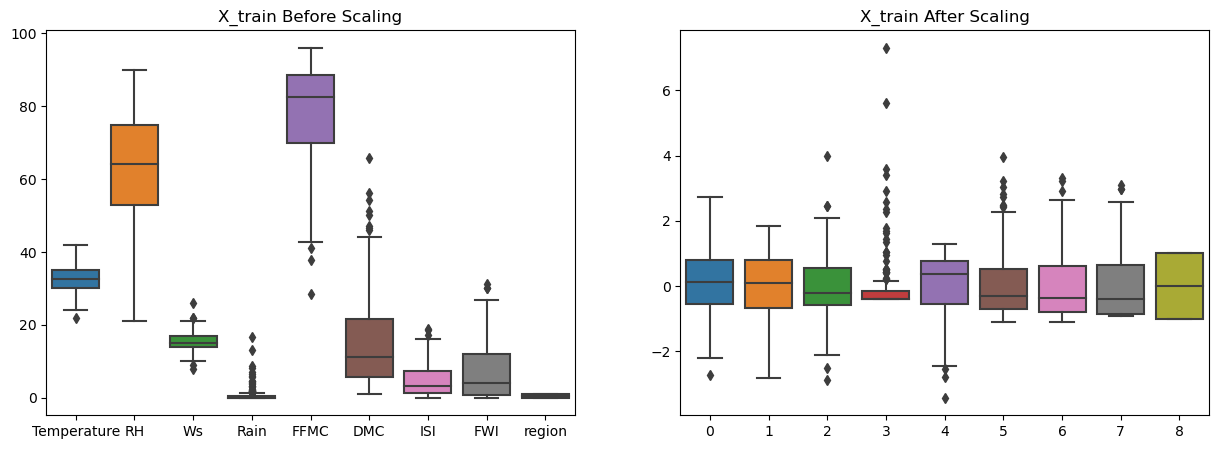

In [90]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

## Model Training

### Model 1: Using Logistic Regression

In [91]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression

In [92]:
log_reg = LogisticRegression()

In [93]:
log_reg.fit(X_train_scaled,y_train)

LogisticRegression()

In [95]:
# print the coefficients and the intercept
print(log_reg.coef_)

[[ 0.14235608  0.16679595 -0.04519559  0.21506436  2.40038196  0.32734008
   2.17281332  1.82618347  0.06040456]]


In [96]:
print(log_reg.intercept_)

[1.40225931]


In [97]:
print("Training Score:",log_reg.score(X_train_scaled, y_train))
print("Test Score:",log_reg.score(X_test_scaled,y_test))

Training Score: 0.9764705882352941
Test Score: 0.9726027397260274


In [98]:
# Prediction for the test data
y_pred = log_reg.predict(X_test_scaled)
y_pred

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [99]:
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})    
predictions

,Actual,Predicted
24,1,1
6,1,1
152,0,0
232,0,0
238,1,1
...,...,...
194,1,1
104,0,0
109,1,1
190,1,1


In [100]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9726027397260274

In [101]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[28,  1],
       [ 1, 43]], dtype=int64)

In [107]:
true_positive = conf_mat[0][0]
true_positive

28

In [105]:
false_positive = conf_mat[0][1]
false_positive

1

In [106]:
false_negative = conf_mat[1][0]
false_negative

1

In [108]:
true_negative = conf_mat[1][1]
true_negative

43

In [109]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.9726027397260274

In [110]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.9655172413793104

In [111]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.9655172413793104

In [112]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9655172413793104

In [113]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [114]:
Classification_Report = classification_report(y_test,y_pred)
print (Classification_Report)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        29
           1       0.98      0.98      0.98        44

    accuracy                           0.97        73
   macro avg       0.97      0.97      0.97        73
weighted avg       0.97      0.97      0.97        73



In [119]:
from sklearn.metrics import plot_confusion_matrix

<Figure size 500x500 with 0 Axes>

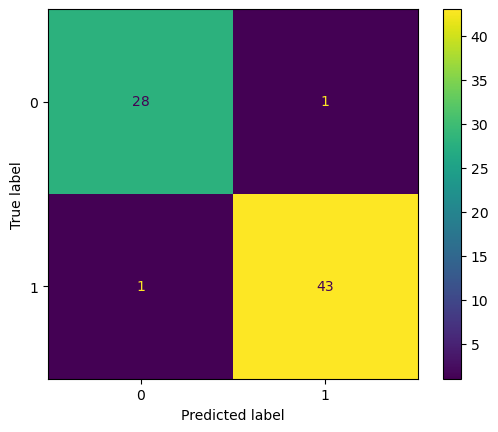

In [124]:
# Confusion matrix display
plt.figure(figsize=(5,5))
plot_confusion_matrix(log_reg, X_test_scaled, y_test)  
plt.show()